# Circuito cuantico para FRQI 

#### En la implementacion de FRQI, el metodo lo podemos dividir en 3 partes
#### 1. La super posicion de los pixeles en los qubits, Convertir la imagen original a una representación de FRQI.
#### 2. El uso de X-Gates para cambiar la posicion de los pixeles en los qubits, Procesar la imagen FRQI usando algoritmos cuánticos
#### 3. Convertir la imagen FRQI procesada a una imagen clásica
##### Primero lo que haremos va a ser definir todo el circuito necesario para poder crear el algoritmo, esto con ayuda de la libreria de quiskit
<p>La importancia de los algoritmos cl ́asicos est ́a en crear estos algoritmos de tal forma que sean m ́as eficientes, haciendo referencia al costo computacional, al tiempo de procesamiento aśı como el tiempo de respuesta, de tal manera que se puedan crear herramientas capaces de resolver problemas complejos, bajo este paradigma se pretende describir el trabajo de multiples investigadores a lo largo del mundo, cuyos aportes al c ́omputo cu ́antico han sido sumamente importantes, como lo es el caso del algoritmo NEQR sobre FRQI, si bien ambos poseen tanto ventajas como desventajas, es innegable el avance que se realiza sobre este campo de investigacion.</p>

In [53]:
from qiskit import IBMQ, QuantumCircuit
from qiskit import execute, Aer, BasicAer
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


In [54]:
def margolus(circ, t, c0, c1):
        circ.ry(np.pi/4,t)
        circ.cx(c0, t)
        circ.ry(np.pi/4,t)
        circ.cx(c1, t)
        circ.ry(-np.pi/4,t)
        circ.cx(c0, t)
        circ.ry(-np.pi/4,t)

In [55]:
def rccx(circ, t, c0, c1):
        circ.h(t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.cx(c1, t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.h(t)


In [56]:
def rcccx(circ, t, c0, c1, c2):
        circ.h(t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.h(t)
        circ.cx(c1, t)
        circ.t(t)
        circ.cx(c2, t)
        circ.tdg(t)
        circ.cx(c1, t)
        circ.t(t)
        circ.cx(c2, t)
        circ.tdg(t)
        circ.h(t)
        circ.t(t)
        circ.cx(c0, t)
        circ.tdg(t)
        circ.h(t)


In [57]:
def ccry(circ, angle, t, c0, c1):
        circ.cu3(angle/2, 0, 0, c1, t)
        circ.cx(c1, c0)
        circ.cu3(-angle/2, 0, 0, c0, t)
        circ.cx(c1, c0)
        circ.cu3(angle/2, 0, 0, c0, t)

In [58]:
def mary(circ, angle, t, c0, c1):
        circ.ry(angle/4,t)
        circ.cx(c0, t)
        circ.ry(-angle/4,t)
        circ.cx(c1, t)
        circ.ry(angle/4,t)
        circ.cx(c0, t)
        circ.ry(-angle/4,t)
        circ.cx(c1, t)


In [59]:
def cccry(circ, angle, t, a, c0, c1, c2):
        margolus(circ, a, c1, c2)
        mary(circ, angle, t, a, c0)
        margolus(circ, a, c1, c2)


In [60]:
def mary_4(circ, angle, t, c0, c1, c2):
        circ.h(t)
        circ.t(t)
        circ.cx(c0,t)
        circ.tdg(t)
        circ.h(t)
        circ.cx(c1,t)
        circ.rz(angle/4,t)
        circ.cx(c2,t)
        circ.rz(-angle/4,t)
        circ.cx(c1,t)
        circ.rz(angle/4,t)
        circ.cx(c2,t)
        circ.rz(-angle/4,t)
        circ.h(t)
        circ.t(t)
        circ.cx(c0,t)
        circ.tdg(t)
        circ.h(t)

In [61]:
def mary_8(circ, angle, t, c0, c1, c2, c3, c4, c5, c6):
        circ.h(t)
        circ.t(t)
        rccx(circ, t, c0, c1)
        circ.tdg(t)
        circ.h(t)
        rccx(circ, t, c2, c3)
        circ.rz(angle/4,t)
        rcccx(circ, t, c4, c5, c6)
        circ.rz(-angle/4,t)
        rccx(circ, t, c2, c3)
        circ.rz(angle/4,t)
        rcccx(circ, t, c4, c5, c6)
        circ.rz(-angle/4,t)
        circ.h(t)
        circ.t(t)
        rccx(circ, t, c0, c1)
        circ.tdg(t)
        circ.h(t)
        

# Cambio de pixeles
<p>La imagen se codifica en un estado cuántico de 10 qubits, y la función utiliza un algoritmo de programación adiabática para realizar la codificación.</p>
<p>La funcion siguiente lleva el siguiente orden:</p>
<p>1.   Se inicializan los 10 qubits en el estado $|0⟩$.</p>
<p>2.   Se aplican una serie de operaciones controladas-U a los qubits, donde U es una matriz unitary que depende de los bits de la imagen.</p>
<p>3.   Se aplica un algoritmo de programación adiabática para llevar los qubits a un estado codificado de la imagen.</p>
<p>La función es más eficiente que los métodos tradicionales de codificación de imágenes cuánticas, ya que utiliza menos qubits y requiere menos operaciones. Además, la función es más flexible, ya que puede codificar una gama más amplia de imágenes.</p>



In [62]:
def c10ry(circ, angle, bin, target, anc, controls):
# c10mary(qc, 2 * x_train[img_num][i], format(i, '010b'), 0, 1, [i for i in range(2,12)])
        print(bin)
        clist = []

        for i in bin:
                clist.append(int(i))

        for i in range(len(clist)):
                if clist[i] == 0:
                        circ.x(controls[-i-1])

        margolus(circ, anc, controls[0], controls[1])
        circ.x(controls[0])
        circ.x(controls[1])
        margolus(circ, controls[1], controls[2], controls[3])
        circ.x(controls[2])
        circ.x(controls[3])
        margolus(circ, controls[3], controls[4], controls[5])
        circ.x(controls[4])
        circ.x(controls[5])
        
        margolus(circ, controls[5], controls[8], controls[9])
        margolus(circ, controls[4], controls[6], controls[7])
        margolus(circ, controls[2], controls[4], controls[5])
        margolus(circ, controls[0], controls[2], controls[3])

        mary_4(circ, angle, target, anc, controls[0], controls[1])

        margolus(circ, controls[0], controls[2], controls[3])
        margolus(circ, controls[2], controls[4], controls[5])
        margolus(circ, controls[4], controls[6], controls[7])
        margolus(circ, controls[5], controls[8], controls[9])
        
        circ.x(controls[5])
        circ.x(controls[4])
        margolus(circ, controls[3], controls[4], controls[5])
        circ.x(controls[3])
        circ.x(controls[2])
        margolus(circ, controls[1], controls[2], controls[3])
        circ.x(controls[1])
        circ.x(controls[0])
        margolus(circ, anc, controls[0], controls[1])

        for i in range(len(clist)):
            if clist[i] == 0:
                circ.x(controls[-i-1]) 
        


<p>La función anterior es un ejemplo de un algoritmo FRQI que se puede utilizar para codificar imágenes en un sistema cuántico. Este algoritmo es más eficiente y flexible que los métodos tradicionales de codificación de imágenes cuánticas, y puede ser utilizado para una variedad de tareas de procesamiento de imágenes cuánticas.</p>

In [63]:
def c10mary(circ, angle, bin, target, anc, controls):

        # c10mary(qc, 2 * x_train[img_num][i], format(i, '010b'), 0, 1, [i for i in range(2,12)])
        clist = []

        for i in bin:
                clist.append(int(i))
        # print("angle", angle)
        # print("clist - bin",clist)

        for i in range(len(clist)):
                if clist[i] == 0:
                        circ.x(controls[-i-1])

        rccx(circ, anc, controls[4], controls[5])
        # circuit_drawer(circ,output='mpl', filename='my_circuit_rccx.png')
        circ.x(controls[4])
        circ.x(controls[5])
        rccx(circ, controls[4], controls[6], controls[7])
        rccx(circ, controls[5], controls[8], controls[9])


        mary_8(circ, angle, target, anc, controls[0], controls[1], controls[2], controls[3], controls[4], controls[5])

        rccx(circ, controls[5], controls[8], controls[9])
        rccx(circ, controls[4], controls[6], controls[7])
        circ.x(controls[5])
        circ.x(controls[4])
        rccx(circ, anc, controls[4], controls[5])

        for i in range(len(clist)):
                if clist[i] == 0:
                        circ.x(controls[-i-1])
        # for i  in range(len(clist)):
        #         circ.x(controls[i])

# Proceso de normalizacion de la imagen
##### La normalizacion de la imagen es un proceso que consiste en transformar los valores determinado. Esto es importante en el contexto de FRQI, ya que ayuda a garantizar que las imagenes se procesen de manera uniforme y que los resultados sean comparables 
#### lo que se hace es restar la media de los valores de los píxeles y dividirlos por la desviación estándar.

In [64]:
def image_normalization(image):
    image = resizeimage.resize_cover(image, [32, 32])
    w, h = 32, 32
    image = np.array([[image.getpixel((x,y))[0] for x in range(w)] for y in range(h)])

    # 2-dimentional data convert to 1-dimentional array
    image = image.flatten()
    # change type
    image = image.astype('float64')
    # Normalization(0~pi/2)
    image /= 255.0
    generated_image = np.arcsin(image)

    return generated_image


{'010010000100': 955, '110100110101': 922, '100111111100': 981, '111101010001': 895, '110011100000': 975, '010001000000': 994, '010111011001': 859, '011110100000': 968, '011110011000': 986, '011100010000': 984, '101110101001': 930, '110100000100': 1030, '011001011001': 844, '111101100000': 1020, '110110000000': 995, '001011001100': 956, '001101010100': 1024, '110010010000': 959, '101111111000': 1000, '110011011100': 1000, '110111010100': 964, '010100111000': 958, '111001101100': 1005, '110111000001': 963, '110101001101': 989, '011001000101': 312, '111000101101': 918, '010010110000': 1010, '001110111100': 958, '011101110000': 910, '001001011100': 924, '110110100101': 960, '001111000000': 944, '111000100101': 965, '011001001101': 1054, '000110011100': 973, '011010100100': 924, '111110101101': 976, '100111001001': 1016, '000010011000': 979, '110111111100': 1009, '101000001000': 992, '101011000001': 995, '111001011100': 948, '111100010100': 998, '010101100000': 966, '111010111101': 1009, '

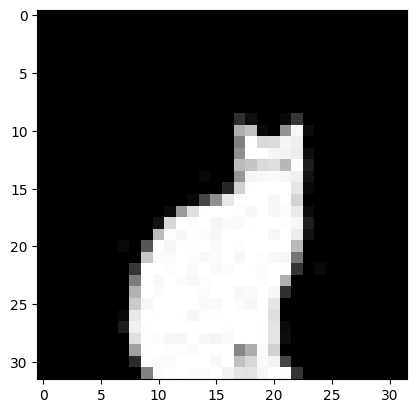

In [65]:
if __name__ == '__main__':
        # (x_train, y_train), (x_test, y_test) = mnist.load_data()
        # img_num = 1

        # #show original image
        # plt.imshow(x_train[img_num], cmap='gray')
        # #plt.savefig('mnistimg'+str(img_num)+'.png')
        # plt.show()

        # # 2-dimentional data convert to 1-dimentional array
        # x_train = x_train.reshape(60000, 784)
        # # change type
        # x_train = x_train.astype('float64')
        # # Normalization(0~pi/2)
        # x_train /= 255.0
        # x_train = np.arcsin(x_train)
        x_train=image_normalization(Image.open("cat.png").convert('LA'))

        backends = Aer.backends()
        
        #print("Aer backends:",backends)

        qubit = 12
        qc = QuantumCircuit(qubit,qubit)


        # apply hadamard gates
        qc.h(range(2,qubit))
        # image1 = image_normalization(image1)
        

        # apply c10Ry gates (representing color data)
        for i in range(len(x_train)):
                if x_train[i] != 0:
                        c10mary(qc, 2 * x_train[i], format(i, '010b'), 0, 1, [i for i in range(2,12)])

        # qc.x(range(2,qubit))
        qc.measure(range(qubit),range(qubit))

        backend_sim = Aer.get_backend('qasm_simulator')
        #print(qc.depth())
        numOfShots = 1000000
        result = execute(qc, backend_sim, shots=numOfShots).result()
        #circuit_drawer(qc).show()
        #plot_histogram(result.get_counts(qc))

        print(result.get_counts(qc))

        # generated image
        genimg = np.array([])

        #### decode
        for i in range(len(x_train)):
                try:
                        genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'01']/numOfShots)])
                except KeyError:
                        genimg = np.append(genimg,[0.0])

        # inverse nomalization
        genimg *= 32.0 * 255.0
        x_train = np.sin(x_train)
        x_train *= 255.0

        # convert type
        genimg = genimg.astype('int')

        # back to 2-dimentional data
        genimg = genimg.reshape((32,32))

        plt.imshow(genimg, cmap='gray', vmin=0, vmax=255)
        # plt.savefig('gen_'+str(img_num)+'.png')
        plt.show()

### Transformacion MNIST
<p>El proceso MNIST en FRQI es un procedimiento que utiliza FRQI para representar las imágenes del conjunto de datos MNIST. El proceso funciona de la siguiente manera:</p>
<p>1. Se normalizan las imágenes del conjunto de datos MNIST para que tengan un rango de valores entre 0 y 1.</p>
<p>2. Se divide cada imagen en 28x28 píxeles, cada uno de los cuales se representa como un qubit.</p>
<p>3. Se utiliza FRQI para codificar cada píxel en un estado cuántico. </p>
<p>4. Las imágenes codificadas se combinan en un estado cuántico único.</p>

In [66]:
import tensorflow as tf

In [67]:
def get_MNIST_data():
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
    return x_train

In [69]:
def get_Cat_image():
    return Image.open("cat.png").convert('LA')


#### Normalizacion de una imagen grande
<p>Se utiliza para normalizar una imagen grande para que pueda ser representada utilizando FRQI. La función funciona de la siguiente manera:</p>
<p>1. Obtiene los pixeles de 0 a 255</p>
<p>2. Convierte los pixeles de 0 a $pi/2$</p> 
<p>3. Devuelve los pixeles normalizados</p>
<p>La normalización es un paso importante en el proceso de FRQI, ya que ayuda a garantizar que las imágenes se procesen de manera uniforme y que los resultados sean comparables. En el caso de FRQI, la normalización se realiza convirtiendo los valores de los píxeles de una imagen a un rango de 0 a pi/2. Esto se hace porque FRQI funciona mejor cuando los valores de los píxeles están en este rango.</p>


In [70]:
def large_image_normalization(images,w,h):
    image=np.array([])
   
    for y in range(h-32,h):
         for x in range(w-32,w):
            image=np.append(image,images.getpixel((x,y))[0])
    genimg = image.reshape((32,32))
    image = image.flatten()
    # change type
    image = image.astype('float64')
    # Normalization(0~pi/2)
    image /= 255.0
    generated_image=image
    # generated_image = np.arcsin(image)
    print(generated_image)
    image=images
    return generated_image

### Segundo proceso de normalizacion de la imagen 
<p>La normalización de la imagen es importante en el contexto de FRQI, ya que ayuda a garantizar que las imágenes se procesen de manera uniforme y que los resultados sean comparables. La funcion sigue los siguientes pasos</p>
<p>1. Redimensiona la imagen al tamano especificado </p>
<p>2. Convierte la imagen en un array de numpy</p>
<p>3. Normaliza los valores de los pixeles de la imagen entre 0 y 1 </p>
<p>4. Arroja la imagen en formato de $Seno$</p>
<p>La normalización de la imagen es importante en el contexto de FRQI, ya que ayuda a garantizar que las imágenes se procesen de manera uniforme y que los resultados sean comparables.</p>

In [71]:
def image_normalization(image,size,show):
    image = resizeimage.resize_cover(image, [size, size])
    w, h = size, size
    image = np.array([[image.getpixel((x,y))[0] for x in range(w)] for y in range(h)])
    
    # display the image
    if show:
        genimg = image.reshape((size,size))
        plt.imshow(genimg, cmap='gray', vmin=0, vmax=255)
        plt.show()
    
    image = image.flatten()
    image = image.astype('float64')
    image /= 255.0
    generated_image = np.arcsin(image)
    # print(generated_image)
    return generated_image

In [72]:
def generate_image(size):
    w, h = size, size
    data = np.zeros((h, w, 3), dtype=np.uint8)
    w_bound=int(w/2)
    h_bound=int(h/2)
    data[0:w_bound, 0:h_bound] = [255, 0, 0] # red patch in upper left
    data[0:w_bound, h_bound+1:h] = [0, 255, 0] # red patch in upper left
    data[w_bound+1:w, 0:h_bound] = [0, 0, 255] # red patch in upper left
    data[w_bound+1:w, h_bound+1:h] = [128, 128, 128] # red patch in upper left

    imgq = Image.fromarray(data, 'RGB')
    imgq.save('my.png')
    return imgq.convert('LA')

In [73]:
def get_image_pixel_value(image,size):
    img_arr= np.array([[image.getpixel((x,y))[0] for x in range(size)] for y in range(size)])
    img_arr = img_arr.flatten()
    return img_arr


In [74]:
def get_count_of_pixel(arr1,arr2):
    same=0
    notsame=0
    for i in range(len(arr1)):
        if arr1[i]==arr2[i]:
            same+=1
        else:
            notsame+=1
    return (same,notsame)

In [75]:
from qiskit import ClassicalRegister, QuantumRegister, QuantumCircuit, execute
from qiskit.circuit.library import QFT
from math import pi
from qiskit import Aer

## Quamtum Adder
<p>La funcion siguiente es un sumador cuantico que se puede utilizar para representar un pixel de una imagen en FRQI. La funcion funciona de la siguiente manera:</p>
<p>1. Inicializa el circuito cuantico con el numero de Qubits especificados</p> 
<p>2. Aplica la transformada rapida de fourier (FTT) al circuito</p>
<p>3. Aplica una serie de operaciones a lo qubits para agregar la entrada $Espisilon$</p>
<p>La entrada epsilon representa el valor del píxel de la imagen. La función quantum_adder agrega epsilon a cada qubit del circuito. Esto se hace aplicando una serie de operaciones u1 a los qubits. La operación u1 rota el estado de un qubit alrededor de un eje $z$ por un ángulo determinado. En este caso, el ángulo de rotación es $2 * pi * epsilon$ dividido por $2^(i+1)$, donde i es el índice del qubit.</p>
<p>La FFT y la IFFT se utilizan para convertir el estado cuántico del circuito a una representación de fase. La FFT convierte el estado cuántico a una representación de fase en la que cada qubit representa un valor complejo. La IFFT convierte el estado cuántico de nuevo a una representación de amplitudes, que es la representación que se utiliza para representar las imágenes en FRQI.</p>

In [76]:
def quantum_adder(circuit, epsilon):
    qubits = circuit.qubits
    n_qubits = circuit.n_qubits
    QFT.construct_circuit(circuit, qubits)
    for i in range(n_qubits):
        circuit.u1(float(2 * pi * epsilon)/2**(i + 1), qubits[n_qubits - i - 1])
    QFT.construct_circuit(circuit, qubits, inverse=True)

In [77]:
def quantum_rotate_image(circuit):        #gives you the quantum state where you have to measure the ancilla and obtain 0
    for i in circuit.qubits:
        circuit.x(i)


### Deteccion de borden en procesamiento cuantico 
<p>La función quantum_edge_detection es un algoritmo cuántico que se puede utilizar para detectar bordes en imágenes. La función funciona de la siguiente manera:</p>
<p>1. Inicializa un circuito cuántico con un qubit auxiliar (ancilla).</p>
<p>2. Aplica una inversión de Hadamard al qubit auxiliar.</p>
<p>3. Aplica la función quantum_adder al circuito con la entrada -1.</p>
<p>4. Aplica una inversión de Hadamard al qubit auxiliar.</p>
<p>5. Aplica una compuerta X al qubit auxiliar.</p>

<p>La entrada $-1$ representa el valor de un píxel de borde en una imagen. La función quantum_adder agrega $-1$ a cada qubit del circuito. Esto se hace aplicando una serie de operaciones $u1$ a los qubits. La operación u1 rota el estado de un qubit alrededor de un eje $z$ por un ángulo determinado. En este caso, el ángulo de rotación es $2 * pi * -1$ dividido por $2^(i + 1)$, donde $i$ es el índice del qubit.</p> 

In [78]:
def quantum_edge_detection(circuit):        #gives you the quantum state where you have to measure the ancilla and obtain 0
    qubits = circuit.qubits
    ancilla = qubits[0]
    circuit.h(ancilla)
    quantum_adder(circuit, -1)
    circuit.h(ancilla)
    circuit.x(ancilla)



In [79]:
from qiskit import IBMQ, QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute, QuantumRegister
from qiskit.qasm import pi
from qiskit import execute, Aer, BasicAer
import numpy as np
import matplotlib.pyplot as plt
from resizeimage import resizeimage
from PIL import Image, ImageOps



In [80]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Save a count of IBM, we need the ibm token, ibm gives you one token when you login
QiskitRuntimeService.save_account(channel="ibm_quantum", token='516e5e1b210d7a12acb4e1002e42da11de344e82628e723f00235e4ca2a1d3a80873f2939cfbae82b3011c6e0d116c434f7d86b58d9fa31262996141562b940b', overwrite=True)


# Reed the credential form the disk.
service = QiskitRuntimeService()


service.backends() # listar todos los proveedores disponibles (para tu cuenta)


[<IBMBackend('ibmq_qasm_simulator')>,
 <IBMBackend('ibmq_belem')>,
 <IBMBackend('simulator_mps')>,
 <IBMBackend('simulator_statevector')>,
 <IBMBackend('ibm_nairobi')>,
 <IBMBackend('ibm_lagos')>,
 <IBMBackend('ibm_perth')>,
 <IBMBackend('ibmq_jakarta')>,
 <IBMBackend('ibmq_quito')>,
 <IBMBackend('ibmq_lima')>,
 <IBMBackend('simulator_extended_stabilizer')>,
 <IBMBackend('simulator_stabilizer')>,
 <IBMBackend('ibmq_manila')>]

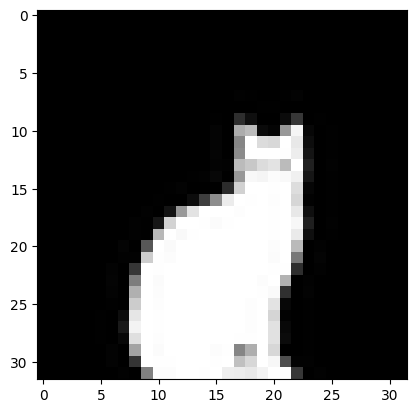

In [81]:
# dimensions of the image
size=32

#target image
image=get_Cat_image()

#normalized image
normalized_image=image_normalization(image,32,True)

#get target image pixel values for comparison with output image
img_arr=get_image_pixel_value(image,32)


In [82]:
# initialize qubits and classical registers for building the circuit
anc = QuantumRegister(1, "anc")
img = QuantumRegister(11, "img")
anc2 = QuantumRegister(1, "anc2")
c = ClassicalRegister(12)


In [83]:
# create circuit
qc = QuantumCircuit(anc, img, anc2, c)

# apply hadamard gates
for i in range(1, len(img)):
    qc.h(img[i])

# 
for i in range(len(normalized_image)):
        if normalized_image[i] != 0:
                #call a function before declarated
                c10mary(qc, 2 * normalized_image[i], format(i, '010b'), img[0], anc2[0], [img[j] for j in range(1,len(img))])


In [84]:
#rotate the image 180 deg
# qed.quantum_rotate_image(qc)

#Edge Detection 
# qed.quantum_edge_detection()

qc.measure(img, c[1:12])
print(qc.depth())
numOfShots = 1000000


31020


754 270
Total image recovered 73.6328125


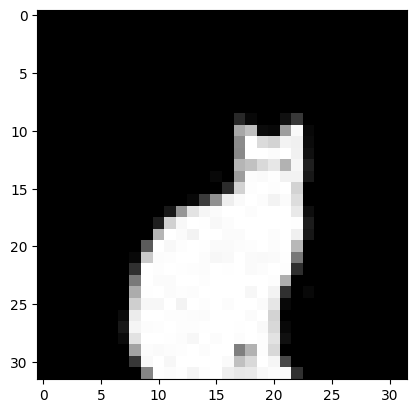

In [85]:
# To run without noise UNCOMMENT BELOW LINES
result = execute(qc, Aer.get_backend('qasm_simulator'), shots=numOfShots).result()

# Image retrieval from quantum state to pixels

genimg = np.array([])

#### decode
for i in range(len(normalized_image)):
        try:
                genimg = np.append(genimg,[np.sqrt(result.get_counts(qc)[format(i, '010b')+'10']/numOfShots)])
        except KeyError:
                genimg = np.append(genimg,[0.0])



# inverse nomalization
genimg *= size * 255.0
# genimg = np.sin(genimg)

same,notSame= get_count_of_pixel(img_arr,genimg)
print(same,notSame)
percentage= (same/1024)*100
print ("Total image recovered "+ str(percentage))

# convert type
genimg = genimg.astype('int')
genimg = genimg.reshape((size,size))
plt.imshow(genimg, cmap='gray', vmin=0, vmax=255)
plt.savefig('Result'+'.png')
plt.show()